In [1]:
import pandas as pd
from scipy import stats as st
from statistics import mode
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("Metadata.csv") as file:
    metadata = pd.read_csv(file)
    
with open("ClimateData.csv") as file:
    climatedata = pd.read_csv(file)
    

#### 1.) Please take a look at the data types and summary of our variables.

In [3]:
metadata

,id,building id
0,building_class,building classification
1,floor_area,floor area (in square feet) of the building
2,year_built,year in which the building was constructed
3,precipitation_inches,annual precipitation in inches at the location...
4,snowfall_inches,annual snowfall in inches at the location of t...
5,avg_temp,average temperature over a year at the locatio...
6,days_with_fog,number of days with fog at the location of the...
7,eui,Site Energy Usage Intensity is the amount of h...


In [4]:
climatedata

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


#### 2.) Summarize the number of unique values in each column.

In [5]:
unique_column_vals = [(column,len(set(climatedata[column]))) for column in climatedata]
unique_column_vals

[('id', 75757),
 ('building_class', 2),
 ('floor_area', 20433),
 ('year_built', 2017),
 ('precipitation_inches', 171),
 ('snowfall_inches', 71),
 ('avg_temp', 173),
 ('days_with_fog', 45838),
 ('site_eui', 17203)]

#### 3.) Check the descriptive statistics for the dataset.

In [6]:
qt = list()
ql = list()

floatType = type(climatedata.loc[0][2])
intType = type(climatedata.loc[0][0])
for colName, colData in climatedata.iteritems():
    if type(colData[0]) == floatType or type(colData[0]) == intType:
        qt.append(colName)
        qt.append(np.mean(colData)),
        qt.append(np.median(colData)),
        qt.append(min(colData)),
        qt.append(max(colData) - min(colData)),
        qt.append(max(colData)),
        qt.append(np.var(colData)),
        qt.append(np.std(colData)),
        qt.append(np.percentile(colData, 25, interpolation = 'midpoint')),
        qt.append(st.iqr(colData, interpolation='midpoint')),
        qt.append(np.percentile(colData, 75, interpolation = 'midpoint'))
    else:
        ql.append(colName)
        ql.append(colData.value_counts() / len(colData)),
        ql.append(mode(colData))

qt = list(zip(*(iter(qt),) * 11))
qt_col_names = [i[0] for i in qt]

ql = list(zip(*(iter(ql),) * 1))

print(f"Qualitative Variable: {ql[0][0]}\nProportion Breakdown: {ql[1][0]}\nMode: {ql[2][0]}.")
print(tabulate(qt, tablefmt="simple_grid", headers=['Quantitative', 'mean', 'median', 'minimum', 'ranges', 'maximum', 'variance', 'stdev', 'q1', 'iqr', 'q3']))        
                     
        

Qualitative Variable: building_class
Proportion Breakdown: Residential    0.57497
Commercial     0.42503
Name: building_class, dtype: float64
Mode: Residential.
┌──────────────────────┬─────────────┬────────────┬───────────┬─────────────────┬─────────────────┬────────────────┬──────────────┬────────────┬──────────────┬─────────────┐
│ Quantitative         │        mean │     median │   minimum │          ranges │         maximum │       variance │        stdev │         q1 │          iqr │          q3 │
├──────────────────────┼─────────────┼────────────┼───────────┼─────────────────┼─────────────────┼────────────────┼──────────────┼────────────┼──────────────┼─────────────┤
│ id                   │  37878      │ 37878      │    0      │ 75756           │ 75756           │    4.7826e+08  │  21869.2     │ 18939      │  37878       │  56817      │
├──────────────────────┼─────────────┼────────────┼───────────┼─────────────────┼─────────────────┼────────────────┼──────────────┼────────────

/tmp/ipykernel_129/2279207217.py:16: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  qt.append(np.percentile(colData, 25, interpolation = 'midpoint')),
/tmp/ipykernel_129/2279207217.py:18: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  qt.append(np.percentile(colData, 75, interpolation = 'midpoint'))
/tmp/ipykernel_129/2279207217.py:16: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  qt.

#### 4.) Check the number of missing values.

In [7]:
climatedata.isna().sum()

id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

#### 5.) Take care of missing data. You can decide to remove or use the imputation.

In [8]:
print(f'Dimensions Before Drop: {climatedata.shape}')
climatedata = climatedata.drop('days_with_fog', axis=1)
print(f'Dimensions After Drop: {climatedata.shape}')

Dimensions Before Drop: (75757, 9)
Dimensions After Drop: (75757, 8)


In [9]:
print(f'Dimensions Before Drop: {climatedata.shape}')
climatedata = climatedata.dropna()
print(f'Dimensions After Drop: {climatedata.shape}')

Dimensions Before Drop: (75757, 8)
Dimensions After Drop: (73920, 8)


#### 6.) Find and remove duplicate variables.

In [10]:
print(f'Dimensions Before Drop: {climatedata.shape}')
climatedata = climatedata.drop_duplicates()
print(f'Dimensions After Drop: {climatedata.shape}')

Dimensions Before Drop: (73920, 8)
Dimensions After Drop: (73920, 8)


There are no duplicate rows or columns

#### 7.) Encode the categorical variables; you can use label encoding, one hot encoding, or...

In [11]:
climatedata['building_class'] = climatedata['building_class'].replace({'Commercial':1, 'Residential':0})

In [12]:
climatedata['building_class']

0        1
1        1
2        1
3        1
4        1
        ..
75752    1
75753    0
75754    1
75755    1
75756    0
Name: building_class, Length: 73920, dtype: int64

#### 8.) Create boxplots and show the outlier.

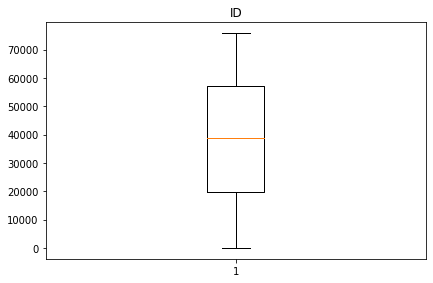

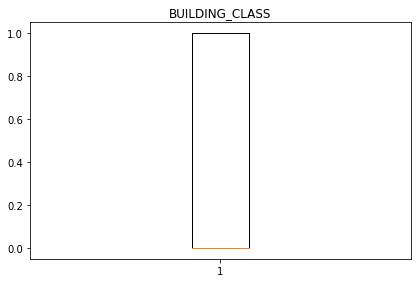

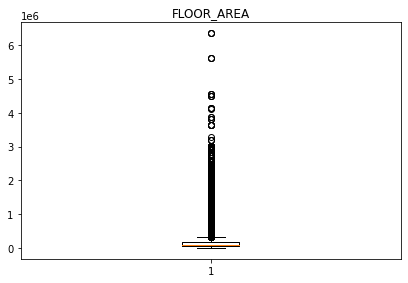

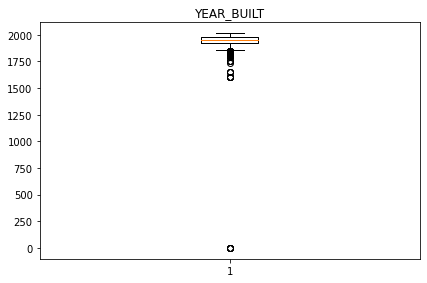

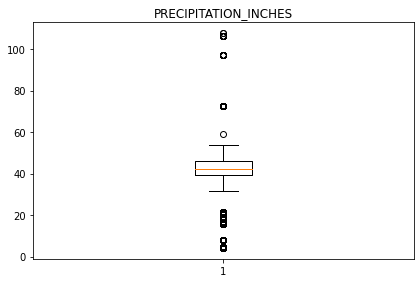

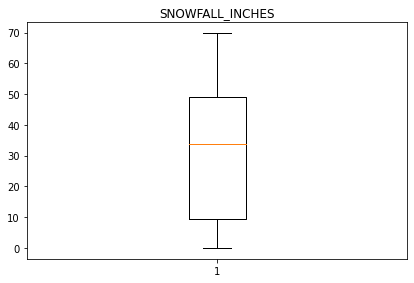

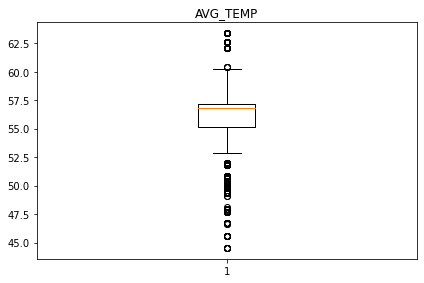

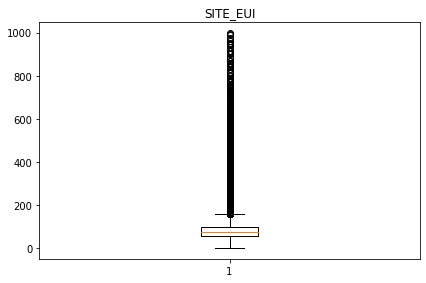

In [13]:
def boxplots(dataset):
    index = 1
    for column_name in dataset:
        plt.figure(figsize=(15,20))
        plt.subplot(4,2,index)
        plt.boxplot(climatedata[column_name])
        plt.title(column_name.upper())
        index += 1
        plt.show()
        
boxplots(climatedata)

#### 9.) Create histograms and check the outliers.

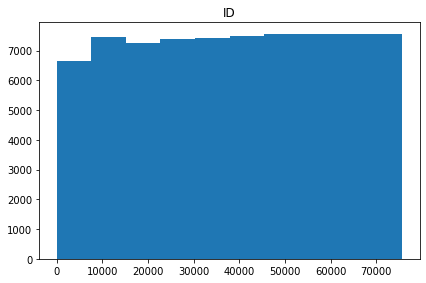

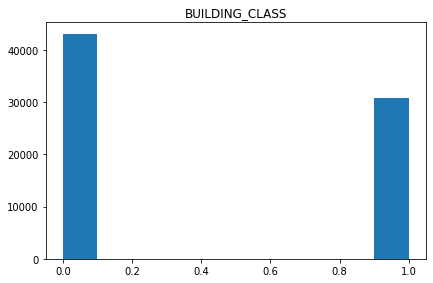

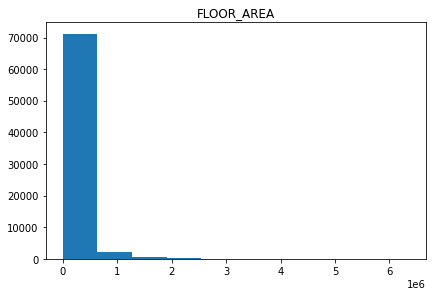

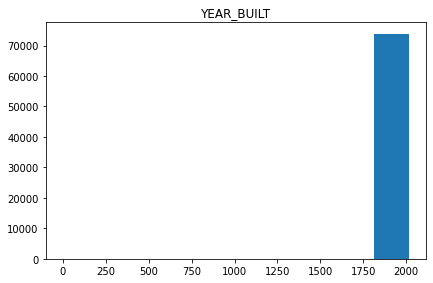

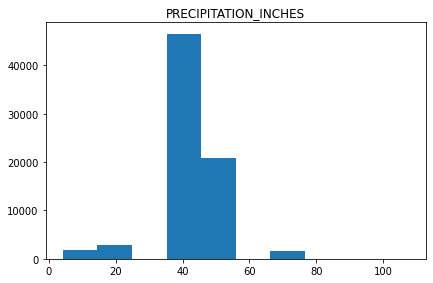

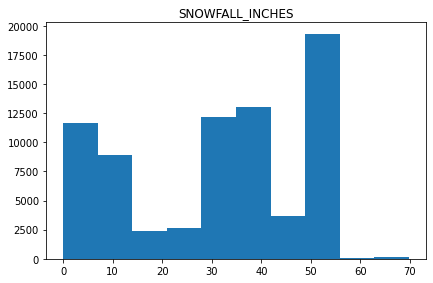

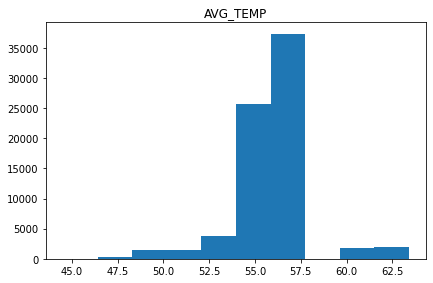

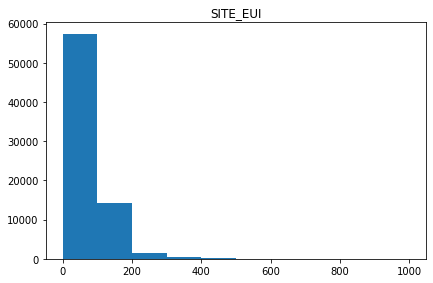

In [14]:
def histograms(dataset):
    index = 1
    for column_name in dataset:
        plt.figure(figsize=(15,20))
        plt.subplot(4,2,index)
        plt.hist(climatedata[column_name])
        plt.title(column_name.upper())
        index += 1
        plt.show()
        
histograms(climatedata)

#### 10.) If feature scaling is needed, do it, please.

In [15]:
varibles_to_be_normalized = ['floor_area', 'precipitation_inches', 'avg_temp', 'site_eui']

In [16]:
def normalizing(data,columns):
    for column in columns:
        data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    return data

normalizing(climatedata,varibles_to_be_normalized)

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,site_eui
0,0,1,0.009359,1942.0,0.120062,0.0,0.659752,0.248458
1,1,1,0.042855,1955.0,0.120062,0.0,0.659752,0.025580
2,2,1,0.043804,1951.0,0.120062,0.0,0.659752,0.023764
3,3,1,0.008427,1980.0,0.120062,0.0,0.659752,0.047559
4,4,1,0.010108,1985.0,0.120062,0.0,0.659752,0.002909
...,...,...,...,...,...,...,...,...
75752,75752,1,0.002930,1995.0,0.394765,1.4,0.563118,0.132334
75753,75753,0,0.006091,1910.0,0.394765,1.4,0.563118,0.038601
75754,75754,1,0.004136,1917.0,0.986767,36.6,0.179965,0.047549
75755,75755,1,0.008151,2012.0,0.986767,36.6,0.179965,0.592876
